In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/MyDrive/Green AI/project/Dataset"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
;cd /content/drive/MyDrive/Green AI/project/Dataset

/content/drive/.shortcut-targets-by-id/1ZGDp4m1XnkL-zvtIhD_ZuNw_YxzufBjC/Green AI/project/Dataset


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import time

# Understand The Labeling
First we need to understand how work each values in a label file.txt.
- We already know that an name_image.jpg have a label name_image.txt.
- We assume that the first number write in a label correspond to describe a class.
- We suppose there is just one class annoted by 0.
- Yolo notation is for one label : class x y width height, so we will look in this direction.

First we create dataframes which contains each values in each labels.

In [ ]:
def data_location(fold):
  """ Create dataframe for labels of the folder input """
  class_instances = []
  x_centers = []
  y_centers = []
  widths = []
  heights = []
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          lines = f.readlines()
          for line in lines:
            label = line.split(' ')
            class_instances.append(float(label[0]))
            x_centers.append(float(label[1]))
            y_centers.append(float(label[2]))
            widths.append(float(label[3]))
            heights.append(float(label[4]))
  return pd.DataFrame({
      'class' : class_instances,
      'x_center' :  x_centers,
      'y_center' : y_centers,
      'width' : widths,
      'height' :  heights
  })

In [ ]:
df_location_train = data_location('train')
df_location_train.head()

,class,x_center,y_center,width,height
0,0.0,0.763221,0.183894,0.086538,0.199519
1,0.0,0.794471,0.556490,0.131010,0.231971
2,0.0,0.687500,0.879808,0.050481,0.106971
3,0.0,0.423077,0.844952,0.108173,0.090144
4,0.0,0.317308,0.141827,0.144231,0.121394


In [ ]:
df_location_valid = data_location('valid')
df_location_valid.head()

,class,x_center,y_center,width,height
0,0.0,0.247596,0.338942,0.066106,0.076923
1,0.0,0.224760,0.455529,0.084135,0.137019
2,0.0,0.061298,0.474760,0.069712,0.061298
3,0.0,0.396635,0.491587,0.087740,0.082933
4,0.0,0.424279,0.437500,0.066106,0.058894


In [ ]:
df_location_test = data_location('test')
df_location_test.head()

,class,x_center,y_center,width,height
0,0.0,0.725962,0.501202,0.543269,0.353365
1,0.0,0.700721,0.569712,0.165865,0.614183
2,0.0,0.766827,0.564904,0.460337,0.769231
3,0.0,0.504808,0.622596,0.504808,0.679087
4,0.0,0.427885,0.832933,0.129808,0.298077


In [ ]:
# Check our hypothesis
assert(df_location_train['class'].unique() == 0)
assert(df_location_valid['class'].unique() == 0)
assert(df_location_test['class'].unique() == 0)
#There is just one class which correspond to describe any type of garbage

There is just one class which correspond to describe any type of garbage.

## A. Load an image

Image n°500 : frame_02075_png_jpg.rf.7dfa17393070c6bd040ed9d408ae0abc.jpg


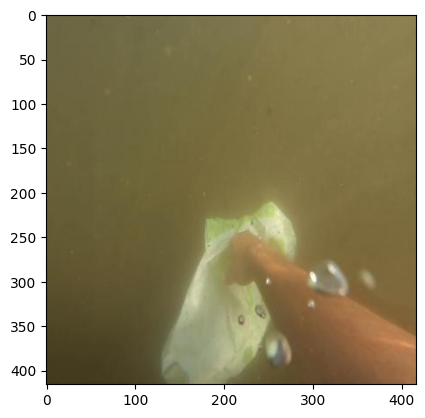

In [ ]:
#load an image, plot it
i = 500
fold_path = os.path.join(data_path, 'train/images')
filenames = os.listdir(fold_path)
name = filenames[i]
print('Image n°{} : {}'.format(i, name))
file_path = os.path.join(fold_path, filenames[i])
im = np.array(Image.open(file_path))
plt.imshow(im)

## B. Get its label

In [ ]:
#get the label of the image
fold_path = os.path.join(data_path, 'train/labels')
filenames = os.listdir(fold_path)
for filename in filenames:
  if name.split('.jpg')[0] == filename.split('.txt')[0]:
    filepath = os.path.join(fold_path, filename)
    f = open(filepath, 'r')
    lines = f.readlines()
    labels = []
    for line in lines:
      label = line.split()
      label = [float(i) for i in label]
      labels.append(label)
    f.close()
    break

print(labels)

[[0.0, 0.48677884615384615, 0.7524038461538461, 0.40625, 0.4855769230769231]]


## C. Annoted image

### Test

(-0.5, 415.5, 415.5, -0.5)

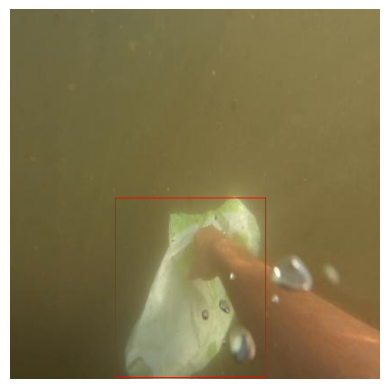

In [ ]:
#load an image, from its label annoted the image
im =  Image.open(file_path)
image_width, image_height = im.size
fig, ax = plt.subplots()
ax.imshow(im)

draw = ImageDraw.Draw(im)
for label in labels:
  _, x_center, y_center, width, height = label
  x_center *= image_width
  y_center *= image_height
  width *= image_width
  height *= image_height
  top_left_x = x_center - (width / 2)
  top_left_y = y_center - (height / 2)
  bottom_right_x = x_center + (width / 2)
  bottom_right_y = y_center + (height / 2)
  draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

plt.imshow(im)
plt.axis('off')

### Final function to see annoted_image

In [ ]:
def annoted_image(image_name, fold='train'):
  """ Resume each previous step.
  Give the name of the image, and in which folder is it (not the path),
  fold = train, valid or test"""
  fold_path = os.path.join(data_path, fold + '/labels')
  filenames = os.listdir(fold_path)
  for filename in filenames:
    if image_name.split('.jpg')[0] == filename.split('.txt')[0]:
      filepath = os.path.join(fold_path, filename)
      f = open(filepath, 'r')
      lines = f.readlines()
      labels = []
      for line in lines:
        label = line.split()
        label = [float(i) for i in label]
        labels.append(label)
      f.close()
      break

  fold_path = os.path.join(data_path, fold + '/images')
  file_path = os.path.join(fold_path, image_name)
  im =  Image.open(file_path)
  image_width, image_height = im.size
  fig, ax = plt.subplots()
  ax.imshow(im)

  draw = ImageDraw.Draw(im)
  for label in labels:
    _, x_center, y_center, width, height = label
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height
    top_left_x = x_center - (width / 2)
    top_left_y = y_center - (height / 2)
    bottom_right_x = x_center + (width / 2)
    bottom_right_y = y_center + (height / 2)
    draw.rectangle([top_left_x, top_left_y, bottom_right_x, bottom_right_y], outline="red")

  plt.imshow(im)
  plt.axis('off')

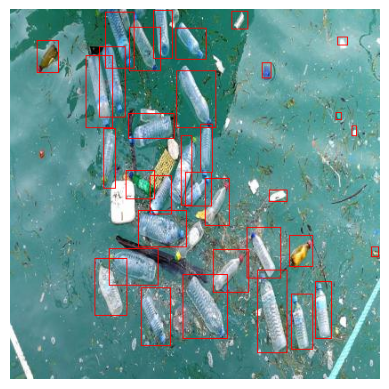

In [ ]:
annoted_image('plastic20_jpg.rf.a89c0d5cf93b937170b5f02b3c23cf7d.jpg')

# Datasets

For each Dataset (train valid, test), we will create a dataframe which contains ,for each images :    
- name of the image
- number of waste in the image
- a label predicted by huggingface which tells us if the image is under or at the surface of the water

## A. Create DataFrame

In [ ]:
def create_dataframe(fold):
  """ create dataframe with column name of the image and number of waste in the image """
  fold_path_im = os.path.join(data_path, fold + '/images')
  image_names = os.listdir(fold_path_im)
  fold_path_lab = os.path.join(data_path, fold + '/labels')
  labels_names = os.listdir(fold_path_lab)
  ims = []
  number_trash = np.array([])
  for image_name in image_names:
      exist = False
      for labels_name in labels_names:
        if labels_name.split('.txt')[0] == image_name[:len(image_name)-4]:
          filepath = os.path.join(fold_path_lab, labels_name)
          f = open(filepath, 'r')
          number_trash = np.append(number_trash,len(f.readlines()))
          f.close()
          exist = True
          break
      ims.append(image_name)
      if not exist:
        #the image don't have a label
        number_trash = np.append(number_trash, np.nan)

  return pd.DataFrame({
      'image name' : ims,
      'number of waste' : number_trash
  })

### Train Dataset

In [ ]:
df_train = create_dataframe('train')
df_train.head()

,image name,number of waste
0,frame_01150_png.rf.fef9a33abdeb1e92e07bfdb4ff5...,5.0
1,frame_01175_png.rf.d032aa4b2c66f33323f868df9dc...,1.0
2,frame_01100_png.rf.f93934b8ff837f3679824c84fca...,1.0
3,frame_01225_png_jpg.rf.3aca72a024f6734197b54c9...,1.0
4,frame_01125_png.rf.9fc790dba4c0443cf535a95d8d5...,1.0


In [ ]:
#some informations about number of waste in image
df_train.describe()

,number of waste
count,1876.000000
mean,1.523454
std,2.951697
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,36.000000


In [ ]:
#check if some labels are missing
df_train.isnull().sum()

image name         0
number of waste    0
dtype: int64

### Valid Dataset

In [ ]:
df_valid = create_dataframe('valid')
df_valid.head()

,image name,number of waste
0,frame_00855_png.rf.992ffee7d10ed6f4f198b40ff1e...,33.0
1,frame_00000_png_jpg.rf.485b485523692e170fcd84b...,1.0
2,frame_00100_png_jpg.rf.f6efff32d135d6c84517725...,1.0
3,frame_00725_png_jpg.rf.0e71131b408dd1dc08e5a5e...,1.0
4,frame_01025_png_jpg.rf.4883ecb34c5dc7caf4699f6...,1.0


In [ ]:
#check if some labels are missing
df_valid.isnull().sum()

image name         0
number of waste    0
dtype: int64

In [ ]:
#some informations about number of waste in image
df_valid.describe()

,number of waste
count,624.000000
mean,1.373397
std,2.360047
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,34.000000


### Test Dataset

In [ ]:
df_test = create_dataframe('test')
df_test.head()

,image name,number of waste
0,frame_00925_png_jpg.rf.5cb66489de79dc1f79e6936...,1.0
1,frame_01175_png_jpg.rf.4b3246bb566a7d908355d88...,1.0
2,frame_00750_png_jpg.rf.6da897419594e684a39bad1...,1.0
3,frame_01075_png_jpg.rf.29f923d6bd8f25b4107b3f5...,1.0
4,frame_00925_png.rf.0c7e88e2b657cc3da0dfbb6bd45...,1.0


In [ ]:
#check if some labels are missing
df_test.isnull().sum()

image name         0
number of waste    0
dtype: int64

In [ ]:
#some informations about number of waste in image
df_test.describe()

,number of waste
count,613.000000
mean,1.218597
std,1.415777
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


## B. Add a new label : Surface / Under Water

Reference : https://huggingface.co/openai/clip-vit-large-patch14

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### Clustering Surface / Under Water

it looks to be :  surface of the water
probability : tensor([[0.7588, 0.2412]], grad_fn=<SoftmaxBackward0>)


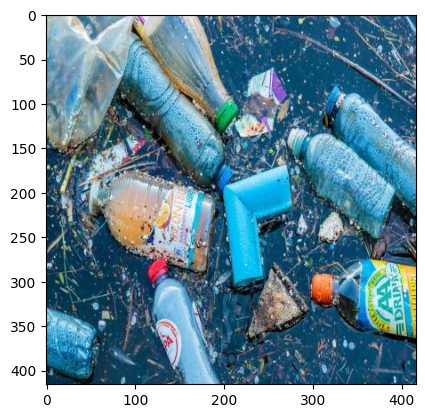

In [ ]:
#First test
#load an image
image_name = 'plastic21_jpg.rf.1b918a70d199b337d91e0aa40dcd2434.jpg'
fold_path = os.path.join(data_path, 'train/images')
file_path = os.path.join(fold_path, image_name)
im =  Image.open(file_path)
plt.imshow(im)
#cluster by group text
text = ["surface of the water", "under the water"]
inputs = processor(text=text, images=im, return_tensors="pt", padding=True)
#result
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # prob to be in each group
probs_arr = [probs[0, 0].item() , probs[0, 1].item()]
max_index = probs_arr.index(max(probs_arr))
print('it looks to be : ', text[max_index])
print('probability :', probs)

In [ ]:
def cluster_water(df, fold):
  """ for each images in the dataset in fold predict if it is under or at the surface of the water """
  #our group
  text = ["surface of the water", "under the water"]
  group = []
  image_names = np.array(df['image name'])
  total = len(image_names)
  step = round((5 * total)/100)
  fold_path_im = os.path.join(data_path, fold + '/images')

  start_time = time.time()
  for i, image_name in enumerate(image_names):

    if i % step == 0:
      part_make = (i * 100)/total
      print('{} min : {} % finish'.format(round((start_time - time.time())/60, 2),round(part_make)))

    file_path = os.path.join(fold_path_im, image_name)
    im =  Image.open(file_path)
    #compute clustering by group text
    inputs = processor(text=text, images=im, return_tensors="pt", padding=True)
    #result
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # prob to be in each group
    probs_arr = [probs[0, 0].item() , probs[0, 1].item()]
    max_index = probs_arr.index(max(probs_arr))
    group.append(text[max_index])
    #print(image_name, text[max_index])


  df['Group'] = group
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"Elapsed Time: {elapsed_time} seconds")
  return df

### On our dataframes

Warning :  you don't need to run, already run before and save in save_csv,
Take a lot of time to run !

In [ ]:
confirm = input('confirm to run clustering for train dataset : [y/N] ')
if confirm == 'y':
  df_train = cluster_water(df_train, 'train')
  df_train.head()

confirm to run clustering for train dataset : [y/N] N


In [ ]:
confirm = input('confirm to run clustering for valid dataset : [y/N] ')
if confirm == 'y':
  df_valid = cluster_water(df_valid, 'valid')
  df_valid.head()

confirm to run clustering for valid dataset : [y/N] N


In [ ]:
confirm = input('confirm to run clustering for test dataset : [y/N] ')
if confirm == 'y':
  df_test = cluster_water(df_test, 'test')
  df_test.head()

confirm to run clustering for test dataset : [y/N] N


In [ ]:
#save it
csv_fold_path = '/content/drive/MyDrive/Green AI/project/save_csv'
confirm = input('confirm to save current train dataset : [y/N] ')
if confirm == 'y':
  csv_path = os.path.join(csv_fold_path, 'train.csv')
  df_train.to_csv(csv_path, index=False)

confirm = input('confirm to save current valid dataset : [y/N] ')
if confirm == 'y':
  csv_path = os.path.join(csv_fold_path, 'valid.csv')
  df_valid.to_csv(csv_path, index=False)

confirm = input('confirm to save current test dataset : [y/N] ')
if confirm == 'y':
  csv_path = os.path.join(csv_fold_path, 'test.csv')
  df_test.to_csv(csv_path, index=False)

confirm to save current train dataset : [y/N] N
confirm to save current valid dataset : [y/N] N
confirm to save current test dataset : [y/N] N


In [ ]:
#load it
try:
  df_train = pd.read_csv("/content/drive/MyDrive/Green AI/project/save_csv/train.csv")
  df_valid = pd.read_csv("/content/drive/MyDrive/Green AI/project/save_csv/valid.csv")
  df_test = pd.read_csv("/content/drive/MyDrive/Green AI/project/save_csv/test.csv")
except:
  print('not exist')

In [ ]:
df_train.head()

,image name,number of waste,Group
0,frame_01150_png_jpg.rf.b96d2107983da43132e9b30...,1.0,under the water
1,frame_01150_png_jpg.rf.ea7d833a34ed97b3af510f8...,1.0,under the water
2,frame_01150_png_jpg.rf.f6b89de899f6d0b397b55dc...,1.0,under the water
3,frame_01170_png.rf.bfddca86b20c4a4c60b72abb7a7...,8.0,under the water
4,frame_01155_png_jpg.rf.f254f63e1928d4f10b788a1...,1.0,under the water


In [ ]:
df_valid.head()

,image name,number of waste,Group
0,11_jpg.rf.e588236442342505d0112df8e25b86c4.jpg,1.0,under the water
1,13_jpg.rf.ca64cb2850955d53ce724205a55f88ee.jpg,1.0,under the water
2,12_png_jpg.rf.6808ca950110eaba980d13d7f3c9eb45...,16.0,under the water
3,15_jpg.rf.5a45959526883e979799fbf0dcad82be.jpg,13.0,under the water
4,17_jpg.rf.d2d76ef3aefe5a8c58321209c941cf0e.jpg,1.0,under the water


In [ ]:
df_test.head()

,image name,number of waste,Group
0,frame_00925_png_jpg.rf.5cb66489de79dc1f79e6936...,1.0,under the water
1,frame_01175_png_jpg.rf.4b3246bb566a7d908355d88...,1.0,under the water
2,frame_00750_png_jpg.rf.6da897419594e684a39bad1...,1.0,under the water
3,frame_01075_png_jpg.rf.29f923d6bd8f25b4107b3f5...,1.0,under the water
4,frame_00925_png.rf.0c7e88e2b657cc3da0dfbb6bd45...,1.0,surface of the water


# Analysis

In [ ]:
datasets = [df_train, df_valid, df_test]
datasets_names = ['Train', 'Valid', 'Test']

## A. Distribution of Trash Instances

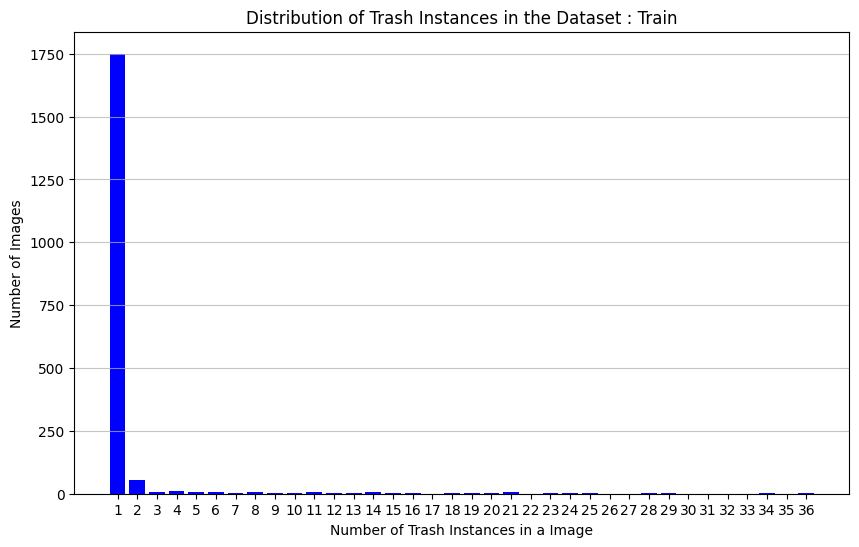

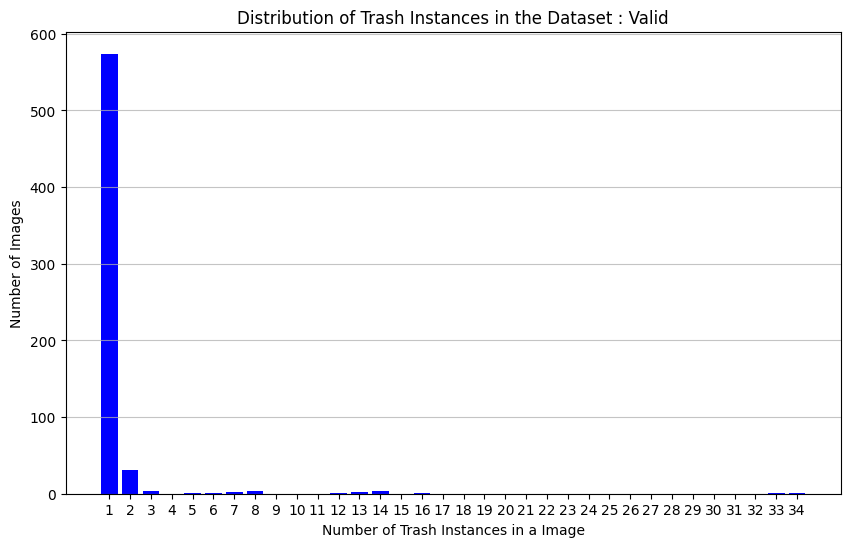

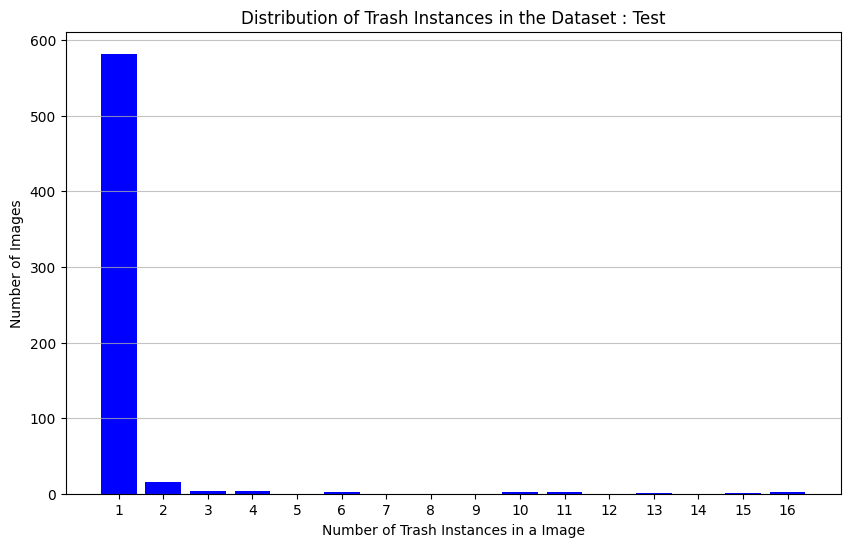

In [ ]:
for i, df in enumerate(datasets):
  trash_counts = np.array(df['number of waste'])
  trash_counts = trash_counts.astype(int)
  plt.figure(figsize=(10, 6))
  plt.hist(trash_counts, bins=range(min(trash_counts), max(trash_counts) + 2), align='left', rwidth=0.8, color='blue')
  plt.xlabel('Number of Trash Instances in a Image')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Trash Instances in the Dataset : ' + datasets_names[i])
  plt.xticks(range(min(trash_counts), max(trash_counts) + 1))
  plt.grid(axis='y', alpha=0.75)
  plt.show()

## B. Repartition of Trash Locations


In [ ]:
def heat_map(df, fold):
  fig, ax = plt.subplots()
  for index, row in df.iterrows():
      # Calculate the coordinates of the rectangle
      x = row['x_center'] - row['width'] / 2
      y = row['y_center'] - row['height'] / 2
      width = row['width']
      height = row['height']

      # Create a rectangle and add it to the plot
      rectangle = plt.Rectangle((x, y), width, height, facecolor="blue", edgecolor="black", alpha=0.002)
      ax.add_patch(rectangle)

  # Set axis labels or any other plot settings if needed
  ax.set_xlabel('X-axis label')
  ax.set_ylabel('Y-axis label')
  ax.invert_yaxis()

  # Show the plot
  plt.title('Garbage Location heatmap for Dataset ' + fold)
  plt.show()

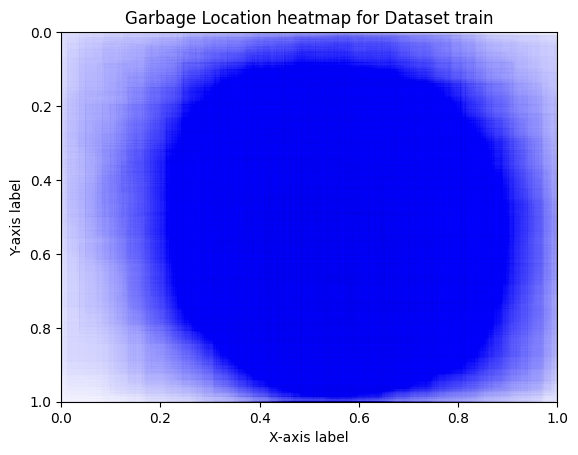

In [ ]:
heat_map(df_location_train, 'train')

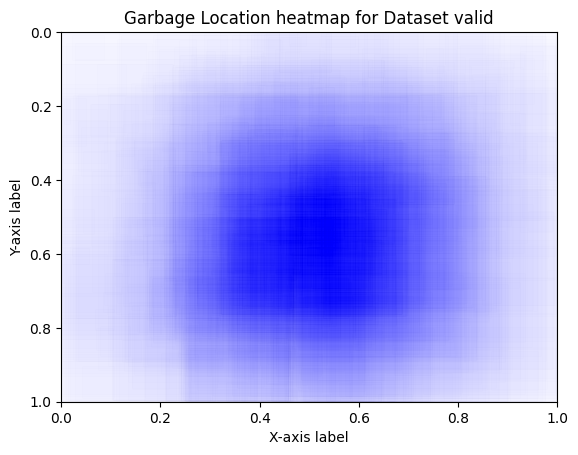

In [ ]:
heat_map(df_location_valid, 'valid')

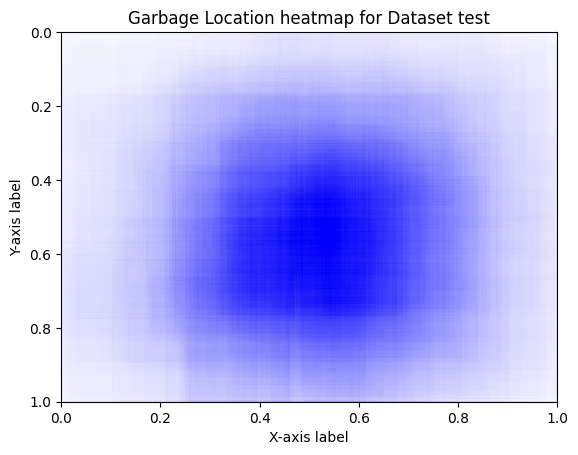

In [ ]:
heat_map(df_location_valid, 'test')

## C. Repartition Surface / Under Water

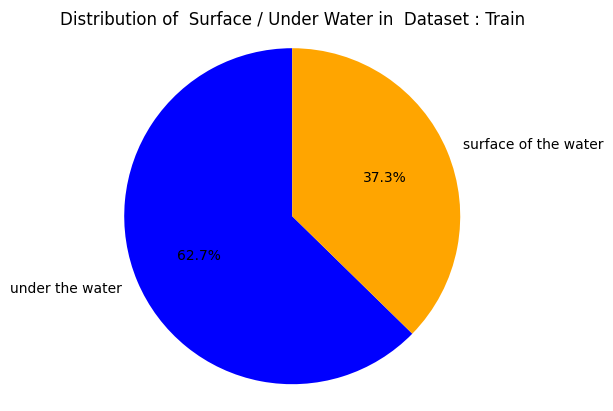

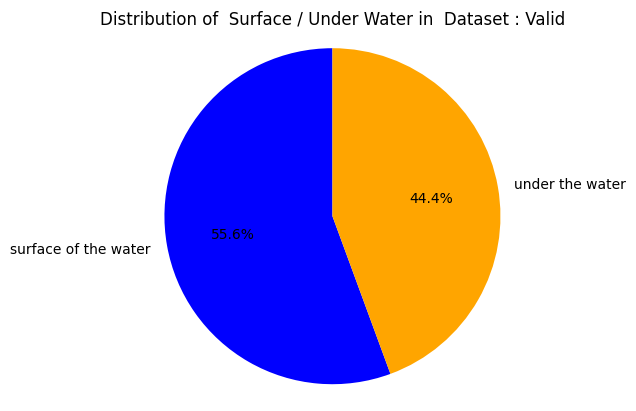

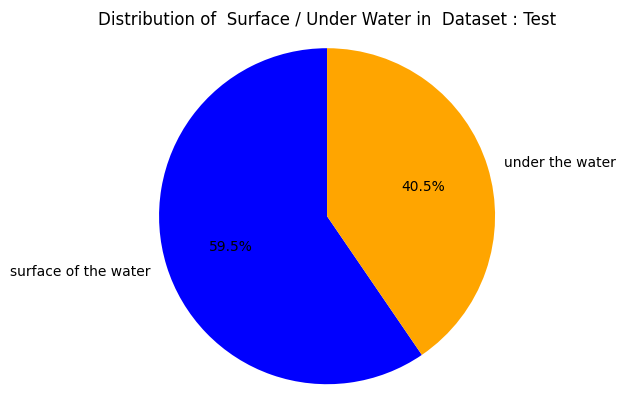

In [ ]:
for i, df in enumerate(datasets):
  label_counts = df['Group'].value_counts()
  labels = label_counts.index
  sizes = label_counts.values

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
  ax.axis('equal')

  plt.title('Distribution of  Surface / Under Water in  Dataset : ' + datasets_names[i])
  plt.show()

## D. Repartition of Trash Locations in depends of Surface / Under Water

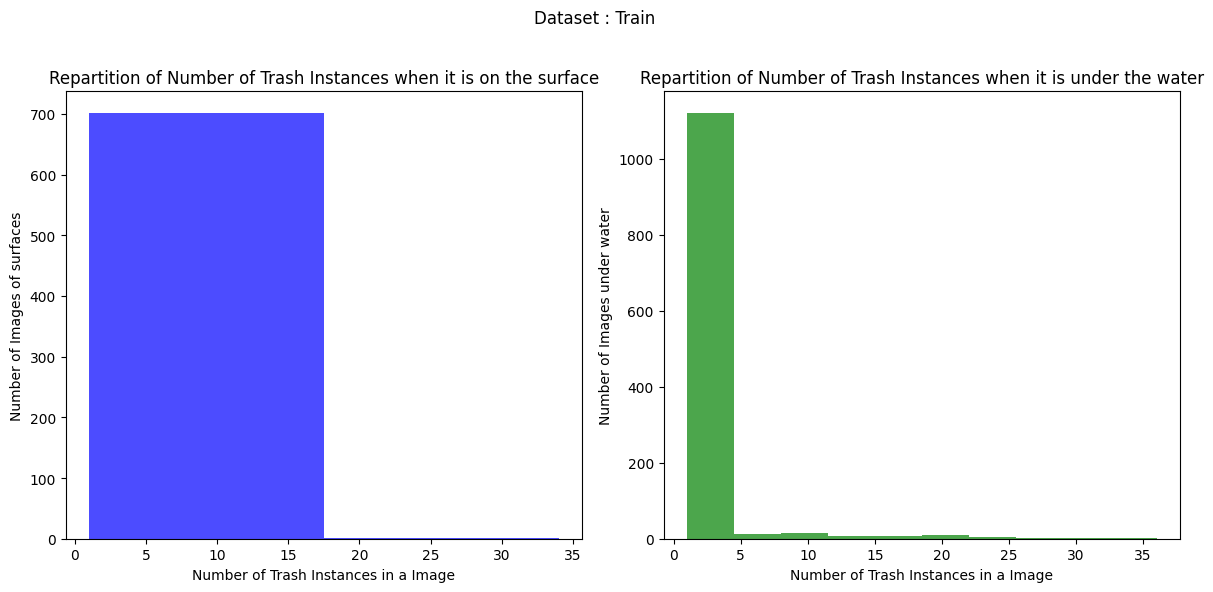

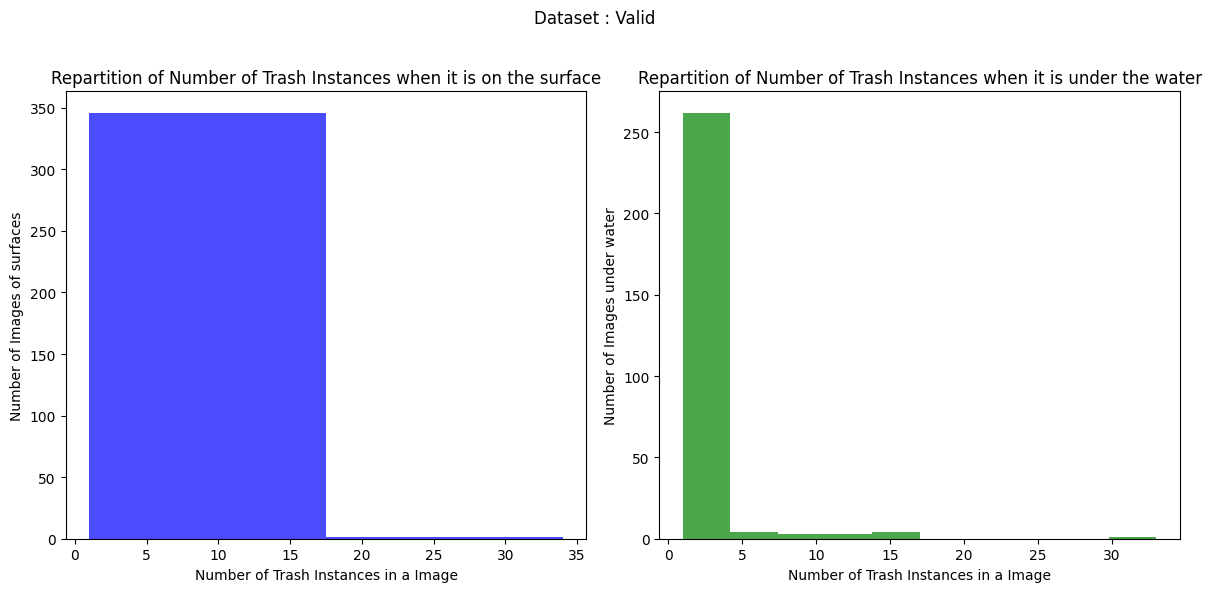

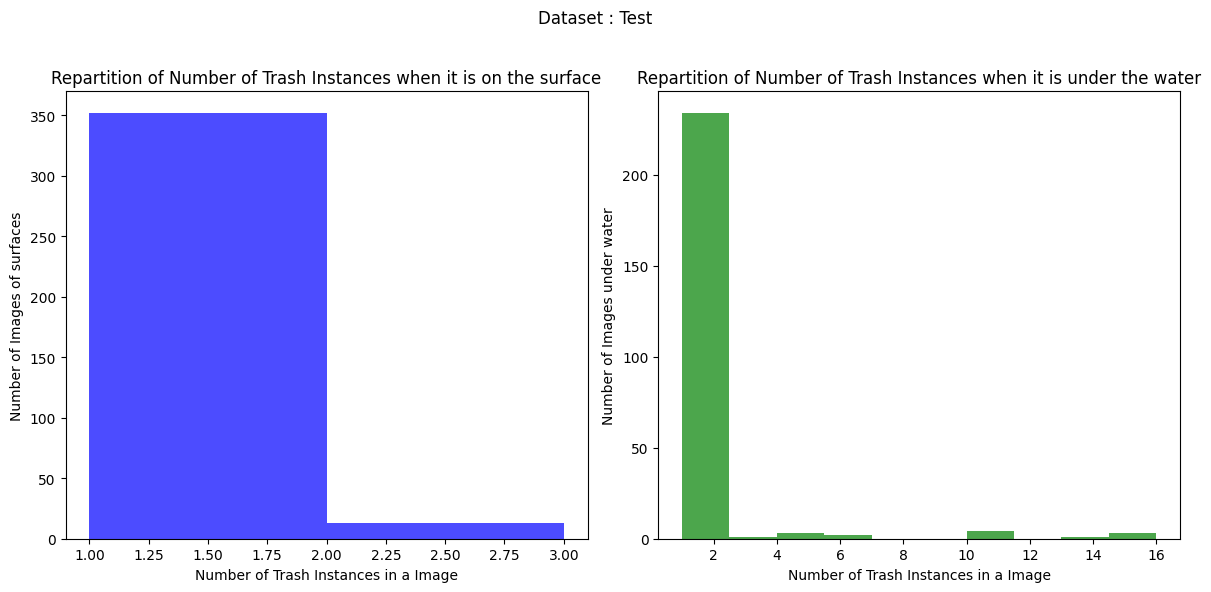

In [ ]:
for i, df in enumerate(datasets):
  surfaces = df.loc[df['Group'] == 'surface of the water', 'number of waste']
  under = df.loc[df['Group'] == 'under the water', 'number of waste']
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

  axes[0].hist(surfaces, bins=2, color='blue', alpha=0.7)
  axes[0].set_title('Repartition of Number of Trash Instances when it is on the surface')

  axes[0].set_xlabel('Number of Trash Instances in a Image')
  axes[0].set_ylabel('Number of Images of surfaces')

  axes[1].hist(under, bins=10, color='green', alpha=0.7)
  axes[1].set_title('Repartition of Number of Trash Instances when it is under the water')
  axes[1].set_xlabel('Number of Trash Instances in a Image')
  axes[1].set_ylabel('Number of Images under water')

  plt.subplots_adjust(wspace=0.5)
  fig.suptitle('Dataset : ' + datasets_names[i])

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

# Error analysis of our models

## A. Load results
First we will load results from exp and exp2 models
exp_path = "/content/drive/MyDrive/Green AI/project/yolov5-master/runs/detect" \\
- first result from model 1 is in exp3, second one in exp6.\\
- We will save results in two dataframes. \\
- Each dataframe will show for each existing detection the localization of the box in the image, with also its area.
- Moreover, we will also create an id column to use later.\\
- We will save in the same way the true labels of test dataset.


In [ ]:
def coord_frame(fold_path_lab):
  labels_names = os.listdir(fold_path_lab)
  names = []
  x_min = []
  y_min = []
  x_max = []
  y_max = []
  areas = []
  ids = []
  id = 0
  #for each label text file in the path
  for labels_name in labels_names:
      filepath = os.path.join(fold_path_lab, labels_name)
      f = open(filepath, 'r')
      lines = f.readlines()
      for line in lines:
        names.append(labels_name)
        ids.append(id)
        id+=1

        labels = [float(val) for val in line.split(' ')]
        _, x_center, y_center, width, height = labels

        # compute localization
        xmin = x_center - (width / 2)
        xmax = x_center + (width / 2)
        ymin = y_center - (height / 2)
        ymax = y_center + (height / 2)
        x_min.append(xmin)
        y_min.append(ymin)
        x_max.append(xmax)
        y_max.append(ymax)
        #compute box area
        areas.append((xmax - xmin) * (ymax - ymin))
      f.close()

  return pd.DataFrame({
      'name' : names,
      'id' : ids,
      'x_min' : x_min,
      'y_min' : y_min,
      'x_max' : x_max,
      'y_max' : y_max,
      'area' : areas
  })

Test dataset with true labels :

In [ ]:
df_box_test = coord_frame('/content/drive/MyDrive/Green AI/project/Dataset/test/labels')
df_box_test.head()

,name,id,x_min,y_min,x_max,y_max,area
0,infer-9_jpg.rf.8996dfaf1bc899b1a887733ed89d1b0...,0,0.381010,0.439303,0.618990,0.861178,0.100398
1,vid_000045_frame0000043_jpg.rf.e684e8b842057be...,1,0.372596,0.531250,0.512019,0.677885,0.020444
2,frame_00000_png_jpg.rf.bbe741a03f7fac408313f22...,2,0.335937,0.146635,0.688101,0.798077,0.229414
3,frame_01250_png_jpg.rf.57b5b8642ef5a2d85e65c3f...,3,0.257212,0.439904,0.543269,0.781250,0.097645
4,frame_01620_png.rf.14a1289426fee9a04930e6866eb...,4,0.632812,0.000601,0.999399,0.999399,0.366146


Labels detect by first model :

In [ ]:
df_box_exp = coord_frame("/content/drive/MyDrive/Green AI/project/yolov5-master/runs/detect/exp3/labels")
df_box_exp.head()

,name,id,x_min,y_min,x_max,y_max,area
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.txt,0,0.336539,0.281250,0.665865,0.757212,0.156747
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.txt,1,0.230770,0.507212,0.625001,0.776443,0.106139
2,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.txt,2,0.233174,0.502404,0.403846,0.716346,0.036514
3,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.txt,3,0.468751,0.372596,0.728365,0.579327,0.053670
4,3_jpg.rf.b5a1109b740523b0b26bd41559856253.txt,4,0.362981,0.473558,0.668269,0.687500,0.065314


Labels detect by second model :

In [ ]:
df_box_exp2 = coord_frame("/content/drive/MyDrive/Green AI/project/yolov5-master/runs/detect/exp6/labels")
df_box_exp2.head()

,name,id,x_min,y_min,x_max,y_max,area
0,13_jpg.rf.66bfb9ab5d1ddcfa48351a275b662de0.txt,0,0.350961,0.264423,0.665865,0.752404,0.153667
1,15_jpg.rf.c921a18631de7ff12168f4f1b9bf4210.txt,1,0.235578,0.514423,0.557693,0.737981,0.072011
2,26_jpg.rf.30ebcae5f6d3f646c1f12e666d4dcdf9.txt,2,0.468750,0.370192,0.723558,0.555288,0.047164
3,3_jpg.rf.b5a1109b740523b0b26bd41559856253.txt,3,0.353366,0.490385,0.658654,0.668270,0.054306
4,4_jpg.rf.468e8403cb432b60d298ad2d01f2d4ea.txt,4,0.819712,0.098558,0.908654,0.281250,0.016249


## B. Compare Results
The main issue with images detection it is on how we compare result, verify efficiency of our models ? \\
So in this part we will:
- Intersection over Union
- count duplicate detections
- count bad detections
- count missed detections
- count excess detections (backgrounds)

### Intersection over Union (IoU)

Intersection over Union (IoU) is a commonly used metric in computer vision and object detection tasks to evaluate the accuracy of predicted bounding boxes or segmented regions. It quantifies the extent of overlap between two sets, normalized by the size of their union. The IoU is calculated using the following formula: \\

IoU = Area of Intersection \ Area of Union

Where:
- Area of Intersection : The region common to both predicted and ground truth bounding boxes or segmented regions.
- Area of Union : The total region covered by both predicted and ground truth bounding boxes or segmented regions.

The IoU value ranges from 0 to 1, where:
- IoU = 0 indicates no overlap.
- IoU = 1 indicates perfect overlap.

A higher IoU generally indicates better accuracy in localization or segmentation tasks, and a common threshold is often used to determine the correctness of predictions.


In [ ]:
def calculate_IoU(box1, box2):
    x1, y1, x2, y2, area1 = box1
    x3, y3, x4, y4, area2 = box2

    # Calculate coordinates of the intersection area
    x_intersection = max(x1, x3)
    y_intersection = max(y1, y3)
    w_intersection = max(0, min(x2, x4) - x_intersection)
    h_intersection = max(0, min(y2, y4) - y_intersection)

    # Calculate areas of the bounding boxes and the intersection
    area_intersection = w_intersection * h_intersection

    # Calculate IoU
    iou = area_intersection / (area1 + area2 - area_intersection) if area1 + area2 - area_intersection > 0 else 0.0
    return iou

### Issue
The main issues with IoU for our data, is that for a label file containing several labels and therefore several detections, we cannot really compare them to those of our real dataset. We therefore wrote the function below which for the labels of our first dataset (test) and that of the detections, for each location we will recover the most logical nesting using the IoU calculation.

In [ ]:
def best_IoU(df1, df2) :
  """
  df1['name'] == df2['name']
   return a dict with key = (id of label1 in df1, id of label2 in df2) and value = IoU(label1, label2),
  There are not duplicate id in our dict, its allow us to us all the existing label,
  (id1, id2) is the best matching label with the best IoU.
  Example :
  {(307, 7): 0.808367348765588, (306, 6): 0.07135004125606902, (308, 5): 0.0}
  """
  #First we get all possible macthing IoU values from the 2 datasets
  all_iou = {}
  for i in range(len(df1)):
    id1 = df1['id'].iloc[i]
    #get x_min, ....., area
    box1 = df1.iloc[i, :][2:7]

    for j in range(len(df2)):
      id2 = df2['id'].iloc[j]
      #get x_min, ....., area
      box2 = df2.iloc[j, :][2:7]
      #compute IoU
      iou = calculate_IoU(box1, box2)
      all_iou[(id1, id2)] = iou

  #We sort all_iou by IoU value in descending order, the best one to the worst
  all_iou = dict(sorted(all_iou.items(), key=lambda x: x[1], reverse=True))
  #best_iou dict is the final result
  best_iou = {}
  #we will not use twice the same label
  id1_explore = []
  id2_explore = []
  for id, iou in all_iou.items():
    id1, id2 = id
    #We look if id1 not already have a partner id, also for id2
    if id1 not in id1_explore and id2 not in id2_explore:
      best_iou[id] = iou
      id1_explore.append(id1)
      id2_explore.append(id2)

  return best_iou

## C. Get results

In [ ]:
def data_results(df, threshold):
  """ df is a detect box dataframe,
  the threshold makes it possible to distinguish good detection (duplicate)
  from bad (bad_localizations)
  """
  missed = 0
  duplicates = 0
  backgrounds = 0
  bad_localizations = 0
  ious = []
  explore = []

  for i in range(len(df['name'])):
    name = df['name'].iloc[i]

    if name not in explore:

      detect_data = df[df['name'] == name]
      test_data = df_box_test[df_box_test['name'] == name]

      # There are more detections than in our test data
      if len(test_data['name']) <= len(detect_data['name']):
        backgrounds += len(detect_data['name']) - len(test_data['name'])
      # There are less detection, 0 is possible !
      else:
        missed += len(test_data['name']) - len(detect_data['name'])

      #get the best matching labels in depends of IoU value
      best_iou = best_IoU(test_data, detect_data)
      for id, iou in best_iou.items():
        if iou >= threshold:
          #good iou value
          duplicates += 1
        else:
          bad_localizations += 1

        ious.append(iou)
      explore.append(name)

  return pd.DataFrame({
      'missed' : [missed],
      'background' : [backgrounds],
      'duplicates' : [duplicates],
      'bad_localization' : [bad_localizations],
      'mean IoU' : [np.mean(ious)],
      'total detections' : [backgrounds + duplicates + bad_localizations]
  })

In [ ]:
df_result_exp = data_results(df_box_exp, 0.7)
df_result_exp

,missed,background,duplicates,bad_localization,mean IoU,total detections
0,43,80,362,211,0.680886,653


In [ ]:
df_result_exp2 = data_results(df_box_exp2, 0.7)
df_result_exp2

,missed,background,duplicates,bad_localization,mean IoU,total detections
0,26,210,389,242,0.660405,841
